# Bank Customer Churn Prediction

Importing the required libraries

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing dataset and printing its shape

In [4]:
dataset = pd.read_csv('Proj1_Data.csv')
dataset.shape

(10000, 14)

# Cleaning data set

In [5]:
dataset.isnull().sum() # return number of missing values for each variable

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Clear the dataset if there are missing values

In [6]:
clean_missing_rows = dataset.dropna(how="all")  # drop rows where all cells in the row in NULL and assign the data to clean_missing_rows
dataset.dropna(axis=1, how="all")  # drop columns if they only contain missing values
dataset.dropna(thresh=25)  # drop rows that contain less than 25 non-missing values

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [7]:
dataset.drop_duplicates(inplace=True)  # remove duplicates, if any, and save the changes to the original data

In [8]:
dataset.nunique() # Get unique count for each variable

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
X = dataset.iloc[:, 3:13].values # Remove Irrelevant Values(['RowNumber', 'CustomerId', 'Surname'])
y = dataset.iloc[:, 13].values

Printing the first five rows of our dataset.

In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dataset.columns # printing variable of dataset

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
plt.rcParams["figure.figsize"] = [10, 8] # setting size of figures

predicting the ratio of the customer who actually left the bank by using a pie plot to visualize.

<AxesSubplot:ylabel='Exited'>

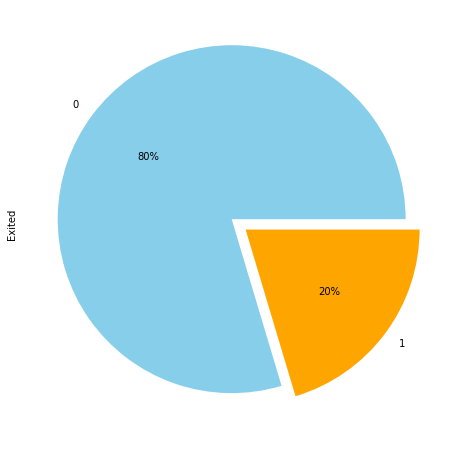

In [14]:
dataset.Exited.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))

Plotting the number of customers from all the geographical locations in the dataset

<AxesSubplot:xlabel='Geography', ylabel='count'>

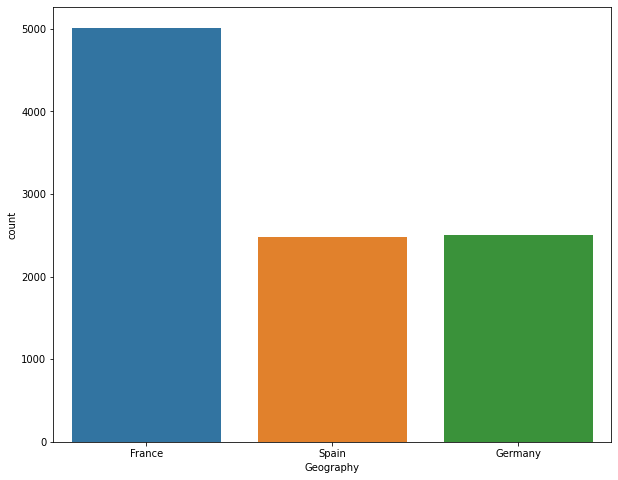

In [15]:
sns.countplot(x='Geography', data=dataset)

Plotting number of customers from each unique geographical location along with customer churn information

<AxesSubplot:xlabel='Exited', ylabel='count'>

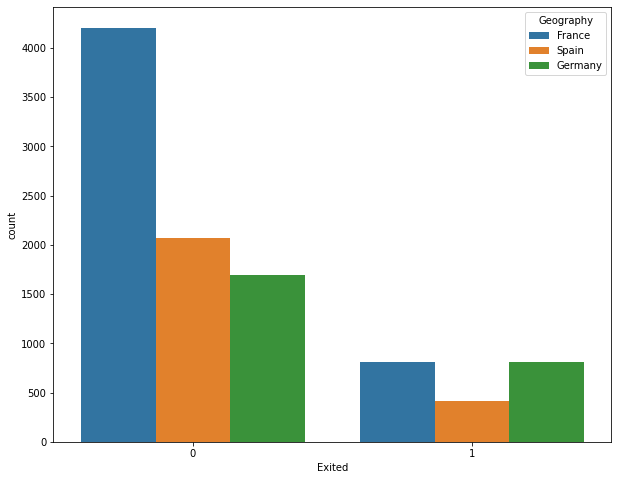

In [16]:
sns.countplot(x='Exited', hue='Geography', data=dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

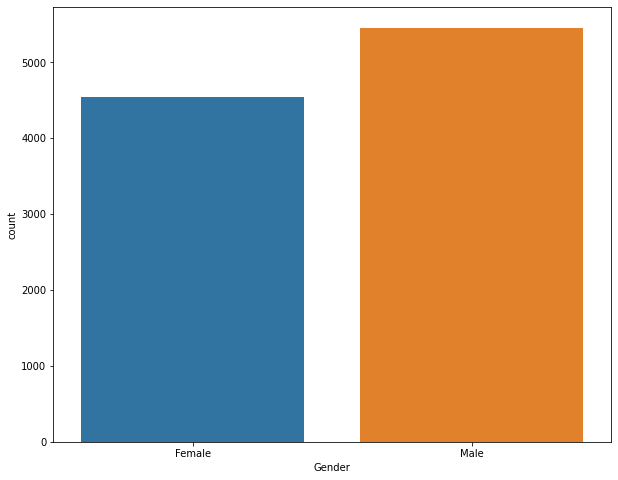

In [15]:
sns.countplot(x='Gender', data=dataset)

<AxesSubplot:xlabel='Exited', ylabel='count'>

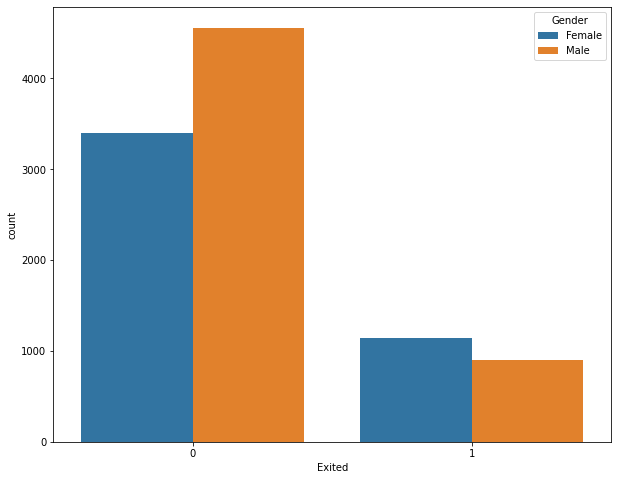

In [17]:
sns.countplot(x='Exited', hue='Gender', data=dataset)

In [17]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# encoding categorical data
# encoding Geography variable 
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

# encoding Gender variable
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


# rescalilng dataset
scaler = MinMaxScaler()
Xscalered = scaler.fit_transform(X)
print(Xscalered)
Xscalered.shape



[[0.538      0.         0.         ... 1.         1.         0.50673489]
 [0.516      1.         0.         ... 0.         1.         0.56270874]
 [0.304      0.         0.         ... 1.         0.         0.56965435]
 ...
 [0.718      0.         0.         ... 0.         1.         0.21039009]
 [0.844      0.5        1.         ... 1.         0.         0.46442905]
 [0.884      0.         0.         ... 1.         0.         0.19091423]]


(10000, 10)

In [19]:
# split training data and test data
X_train, X_test, y_train, y_test = train_test_split(Xscalered, y, test_size = 0.2, random_state = 0)
X_train.shape[1]

10

# Initializing the ANN

In [20]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #used to initialize the NN
from keras.layers import Dense  #used to build the hidden Layers
from keras.layers import Dropout
from keras.optimizers import *
import tensorflow as tf
from tensorflow.keras import initializers


# Model 1

In [21]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.01)
epoch = 5
batch_size = 5
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier1 = Sequential()

# Adding the input layer and the first hidden layer with dropout
classifier1.add(Dense(units = 1, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) ##10 = X.shape[1]

# Adding the output layer
classifier1.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier1.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier1.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) #verbose = 0 turn off progress


Epoch 1/5
1600/1600 [==============================] - 4s 3ms/step - loss: 0.4747 - accuracy: 0.7960 - val_loss: 0.4500 - val_accuracy: 0.7975
Epoch 2/5
1600/1600 [==============================] - 4s 2ms/step - loss: 0.4456 - accuracy: 0.7969 - val_loss: 0.4366 - val_accuracy: 0.7975
Epoch 3/5
1600/1600 [==============================] - 4s 2ms/step - loss: 0.4409 - accuracy: 0.7959 - val_loss: 0.4396 - val_accuracy: 0.7975
Epoch 4/5
1600/1600 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.7960 - val_loss: 0.4317 - val_accuracy: 0.7975
Epoch 5/5
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4375 - accuracy: 0.7959 - val_loss: 0.4276 - val_accuracy: 0.7975


In [22]:
weights = classifier1.get_weights()

print(weights)

classifier1.save_weights('model1.h5')   

# # print format of weights
# kernel_1, bias_1 = classifier1.layers[0].get_weights()
# print('kernel_1:')
# print(kernel_1)
# print('bias_1:')
# print(bias_1)
# print()
# # print out the weight coefficients of second output layer
# kernel_2, bias_2 = classifier1.layers[1].get_weights()
# print('kernel_2:')
# print(kernel_2)
# print('bias:_2')
# print(bias_2)
# print()

[array([[ 0.29903546],
       [-0.12891   ],
       [ 0.36041078],
       [-4.590746  ],
       [ 0.17331317],
       [-0.6874527 ],
       [ 0.1974369 ],
       [-0.07152026],
       [ 0.58054143],
       [ 0.04318937]], dtype=float32), array([1.7502567], dtype=float32), array([[-1.6936282]], dtype=float32), array([-0.03369028], dtype=float32)]


In [23]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)


[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [24]:
# # make class predictions with the model
# predictions = classifier1.predict_classes(X_test)
# # summarize the first 5 cases
# for i in range(5):
# 	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


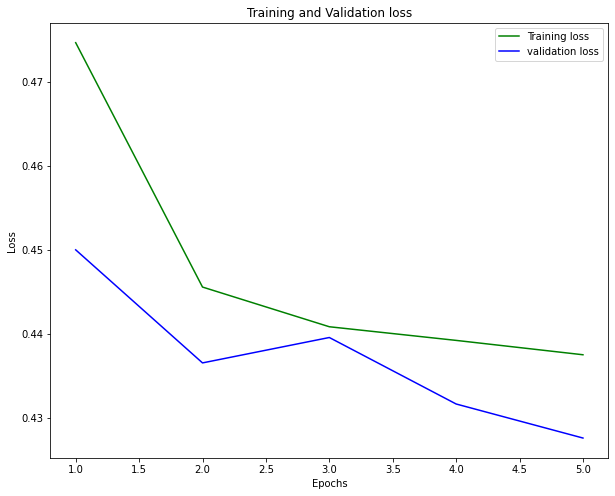

In [26]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

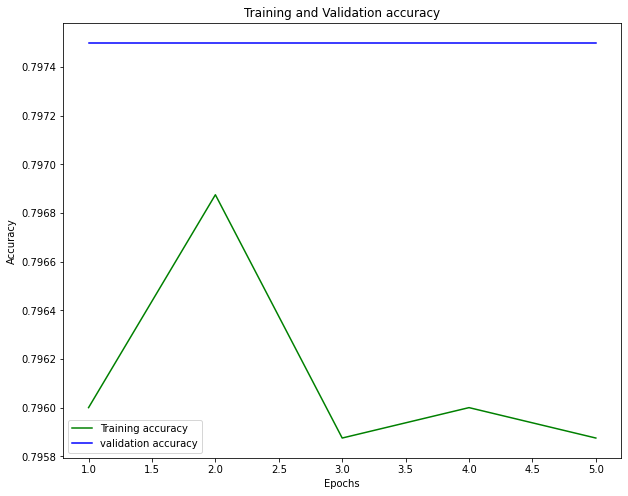

In [27]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Model 2

In [28]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.03)
epoch = 5
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier2 = Sequential()

# Adding the input layer and the first hidden layer with dropout
classifier2.add(Dense(units = 1, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) ##10 = X.shape[1]

# Adding the output layer
classifier2.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier2.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier2.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) #verbose = 0 turn off progress


Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 0.5099 - accuracy: 0.7955 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.5070 - accuracy: 0.7960 - val_loss: 0.5048 - val_accuracy: 0.7975
Epoch 3/5
800/800 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 4/5
800/800 [==============================] - 2s 2ms/step - loss: 0.5069 - accuracy: 0.7960 - val_loss: 0.5054 - val_accuracy: 0.7975
Epoch 5/5
800/800 [==============================] - 2s 2ms/step - loss: 0.5065 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975


In [29]:
weights = classifier2.get_weights()
print(weights)
classifier2.save_weights('model2.h5')

[array([[-0.14793772],
       [-0.18177618],
       [-0.21543163],
       [-0.14879972],
       [-0.21174765],
       [-0.17038567],
       [-0.15197055],
       [-0.20264629],
       [-0.14713486],
       [-0.21910767]], dtype=float32), array([-0.18007497], dtype=float32), array([[-0.14815336]], dtype=float32), array([-1.3222256], dtype=float32)]


In [30]:
# Predicting the Test set results
y_pred = classifier2.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


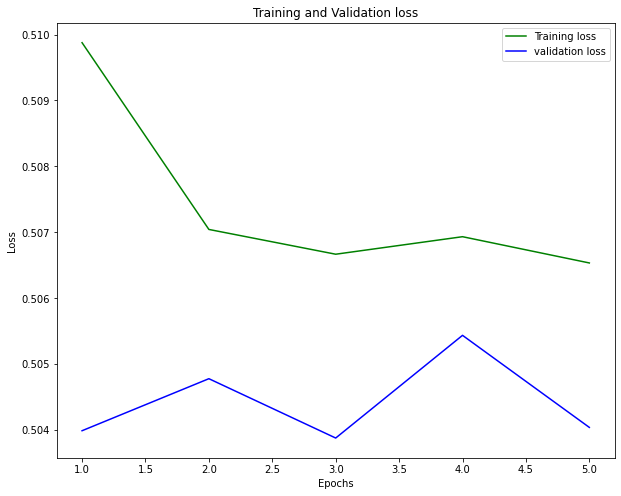

In [32]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

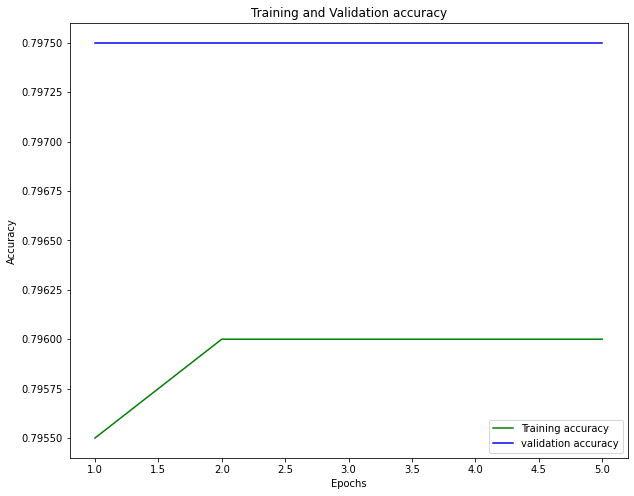

In [33]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 3

In [34]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 10
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier3 = Sequential()

# Adding the input layer and the first hidden layer with dropout
classifier3.add(Dense(units = 1, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) ##10 = X.shape[1]

# Adding the output layer
classifier3.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier3.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier3.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) #verbose = 0 turn off progress

Epoch 1/10
690/800 [========================>.....] - ETA: 0s - loss: 0.4796 - accuracy: 0.7964

KeyboardInterrupt: 

In [44]:
weights = classifier3.get_weights()
print(weights)
classifier3.save_weights('model3.h5')

[array([[ 0.42586118],
       [-0.03456568],
       [ 0.49220508],
       [-6.683635  ],
       [ 0.17309268],
       [-0.9447008 ],
       [ 0.20846672],
       [ 0.07982676],
       [ 0.6432967 ],
       [ 0.08062522]], dtype=float32), array([2.648954], dtype=float32), array([[-1.2089114]], dtype=float32), array([0.009682], dtype=float32)]


In [45]:
# Predicting the Test set results
y_pred = classifier3.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1502   93]
 [ 311   94]]


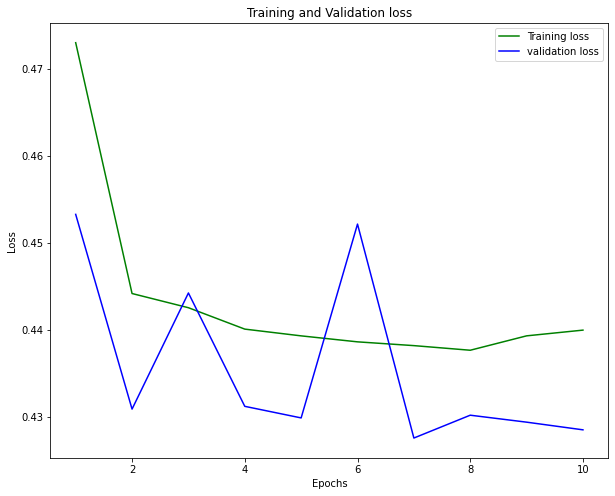

In [47]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

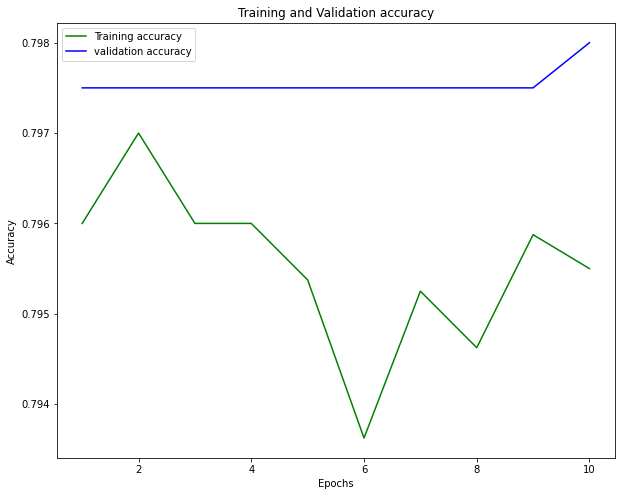

In [48]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 4

In [50]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 10
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier4 = Sequential()

# Adding the input layer and the first hidden layer
classifier4.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the output layer
classifier4.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier4.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier4.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))  

Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 0.4682 - accuracy: 0.7958 - val_loss: 0.4434 - val_accuracy: 0.7975
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.8069 - val_loss: 0.4265 - val_accuracy: 0.8260
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4322 - accuracy: 0.8231 - val_loss: 0.4359 - val_accuracy: 0.8290
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4284 - accuracy: 0.8255 - val_loss: 0.4164 - val_accuracy: 0.8290
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4255 - accuracy: 0.8289 - val_loss: 0.4163 - val_accuracy: 0.8325
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8307 - val_loss: 0.4182 - val_accuracy: 0.8320
Epoch 7/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4256 - accuracy: 0.8298 - val_loss: 0.4154 - val_accuracy: 0.8385
Epoch 

In [57]:
weights = classifier4.get_weights()
print(weights)
classifier4.save_weights('model4.h5')

[array([[-0.11396   , -0.10493649, -0.01119492,  0.37399328, -0.16271576],
       [ 0.21235381, -0.15968484, -0.04464018, -0.1840368 , -0.09173796],
       [ 0.5802267 , -0.15695274, -0.03628712,  0.39877298, -0.07810339],
       [-0.49272496, -0.13959505, -0.04492103, -6.600351  , -0.11823145],
       [ 0.18663393, -0.10191824, -0.03262528,  0.07614655, -0.09568385],
       [-2.3804746 , -0.10927671, -0.04100231,  0.10959074, -0.161591  ],
       [ 0.4042981 , -0.08690224,  0.02668073,  0.03593355, -0.11584789],
       [ 0.08743642, -0.12858029, -0.02696439,  0.07026069, -0.16138685],
       [ 3.5300825 , -0.10041844,  0.00694704, -0.87837756, -0.10282116],
       [-0.4088215 , -0.07974029, -0.01986313,  0.13376334, -0.10769548]],
      dtype=float32), array([ 0.77863675, -0.12006854,  0.        ,  3.0455613 , -0.12008038],
      dtype=float32), array([[-0.5817034 ],
       [-0.08329251],
       [ 0.00272409],
       [-1.4919267 ],
       [-0.07716376]], dtype=float32), array([1.21970

In [52]:
# Predicting the Test set results
y_pred = classifier4.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1576   19]
 [ 326   79]]


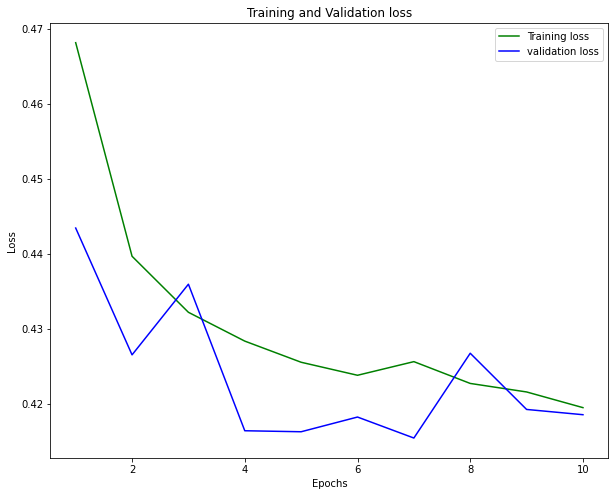

In [54]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

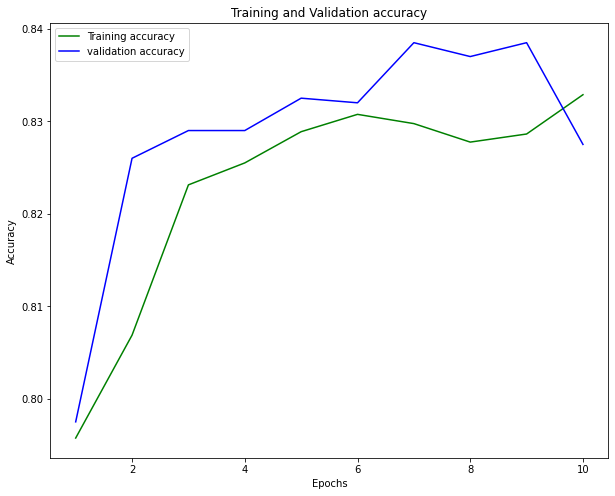

In [55]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 5

In [58]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 10
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier5 = Sequential()

# Adding the input layer and the first hidden layer
classifier5.add(Dense(units = 10, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the output layer
classifier5.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier5.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier5.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) 


Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 0.4646 - accuracy: 0.7960 - val_loss: 0.4541 - val_accuracy: 0.7975
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4422 - accuracy: 0.8055 - val_loss: 0.4246 - val_accuracy: 0.8300
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4301 - accuracy: 0.8246 - val_loss: 0.4210 - val_accuracy: 0.8295
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4260 - accuracy: 0.8269 - val_loss: 0.4207 - val_accuracy: 0.8285
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8270 - val_loss: 0.4305 - val_accuracy: 0.8270
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4217 - accuracy: 0.8271 - val_loss: 0.4106 - val_accuracy: 0.8380
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4193 - accuracy: 0.8324 - val_loss: 0.4206 - val_accuracy: 0.8345
Epoch 

In [59]:
weights = classifier5.get_weights()
print(weights)
classifier5.save_weights('model5.h5')

[array([[-8.58626440e-02, -1.45938754e-01, -6.85731694e-02,
        -7.51508772e-02,  1.96654275e-01,  4.01043028e-01,
        -2.83187926e-01, -1.00111246e-01, -6.16171062e-02,
        -1.62679464e-01],
       [-7.80185089e-02, -8.53452608e-02, -2.91123148e-02,
        -4.51685451e-02, -5.12041998e+00,  5.37523687e-01,
         8.69738907e-02, -1.11092910e-01,  4.51185435e-01,
         7.21093774e-01],
       [-1.11311702e-02, -6.92874864e-02, -3.54713090e-02,
        -3.34722176e-02,  5.93204750e-05,  1.56263635e-01,
         4.34655219e-01, -1.39452703e-02,  1.97564378e-01,
         8.05112600e-01],
       [-1.05939940e-01, -7.54670352e-02, -1.14594273e-01,
        -1.10798649e-01, -4.61345911e+00, -6.76608086e+00,
         3.53871018e-01, -1.06507055e-01, -4.25679207e+00,
        -3.15703773e+00],
       [-1.46496519e-01, -1.13302089e-01, -1.23056509e-01,
        -1.28322184e-01, -7.25876540e-02,  2.65585212e-03,
         2.16637790e-01, -1.51297778e-01, -3.28049697e-02,
        -3

In [60]:
# Predicting the Test set results
y_pred = classifier5.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1555   40]
 [ 273  132]]


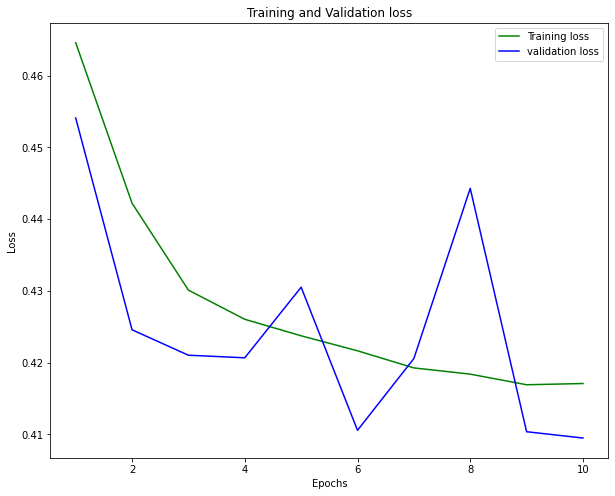

In [62]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

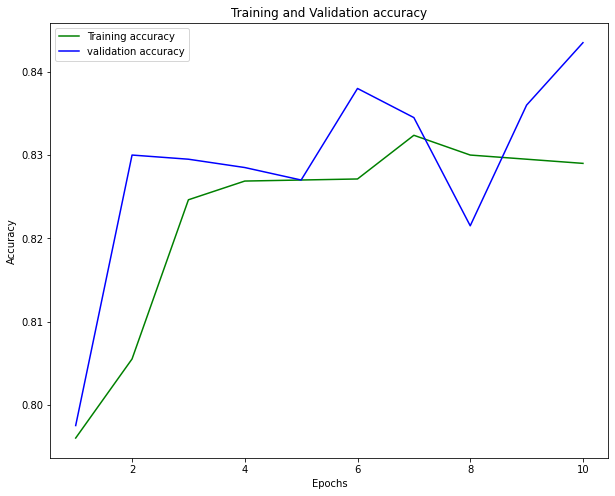

In [63]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MOdel 6

In [64]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 10
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier6 = Sequential()

# Adding the input layer and the first hidden layer
classifier6.add(Dense(units = 10, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hidden layer
classifier6.add(Dense(units = 1, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier6.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier6.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier6.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) 


Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 0.5127 - accuracy: 0.7950 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5065 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5069 - accuracy: 0.7960 - val_loss: 0.5043 - val_accuracy: 0.7975
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5045 - val_accuracy: 0.7975
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5056 - val_accuracy: 0.7975
Epoch 7/10
800/800 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 

In [65]:
weights = classifier6.get_weights()
print(weights)
classifier6.save_weights('model6.h5')

[array([[ 0.15467125,  0.10398987, -0.03504071,  0.11863345,  0.15491064,
        -0.10590059, -0.08648886, -0.1653489 , -0.04456489,  0.15333581],
       [ 0.1454934 , -0.00414212, -0.00345167,  0.09127188, -0.02216103,
        -0.02312563,  0.0104983 , -0.14527424, -0.04059297,  0.02788429],
       [ 0.13693635, -0.04496335,  0.01326242,  0.10125052,  0.15107515,
        -0.04576346, -0.0417366 , -0.07946376, -0.00826557, -0.04055994],
       [ 0.10380577,  0.1060207 ,  0.00396335,  0.02559758,  0.07378159,
        -0.07911357, -0.10590474, -0.0803322 , -0.04064427,  0.07026201],
       [ 0.10341473,  0.05399593, -0.03705012,  0.10076214,  0.11789273,
        -0.07650076, -0.12812275, -0.08395318, -0.03821152,  0.11561259],
       [ 0.1211313 ,  0.08416537,  0.03911953,  0.13206893,  0.0990298 ,
        -0.08663128, -0.1072178 , -0.16224045,  0.00105609,  0.06575872],
       [ 0.10567413,  0.08224147,  0.04840555,  0.09660701,  0.0749661 ,
        -0.05038931, -0.13854848, -0.1557722

In [66]:
# Predicting the Test set results
y_pred = classifier6.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


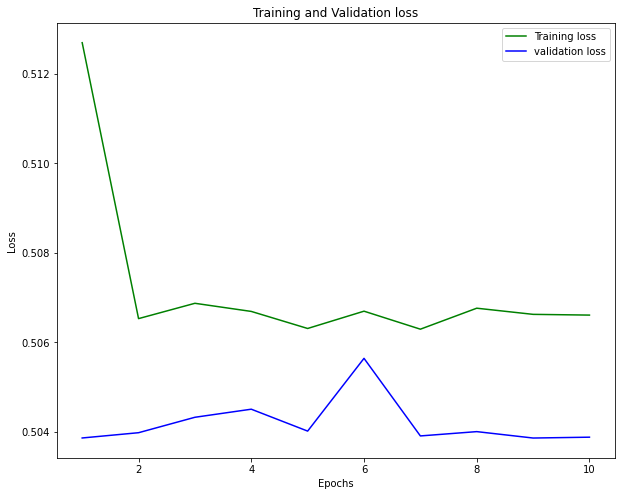

In [68]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

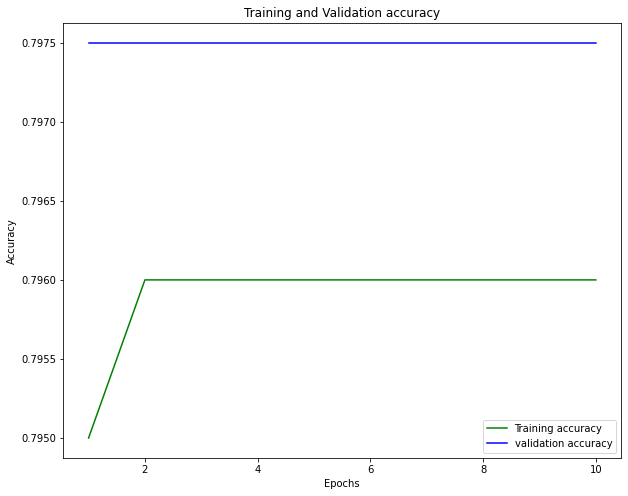

In [69]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 7

In [70]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.015)
epoch = 15
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier7 = Sequential()

# Adding the input layer and the first hidden layer
classifier7.add(Dense(units = 10, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) ##10 = X.shape[1]

# Adding the second hidden layer
classifier7.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier7.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier7.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier7.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) 

Epoch 1/15
800/800 [==============================] - 4s 5ms/step - loss: 0.4654 - accuracy: 0.7960 - val_loss: 0.4484 - val_accuracy: 0.7975
Epoch 2/15
800/800 [==============================] - 2s 3ms/step - loss: 0.4413 - accuracy: 0.8091 - val_loss: 0.4417 - val_accuracy: 0.8315
Epoch 3/15
800/800 [==============================] - 2s 3ms/step - loss: 0.4363 - accuracy: 0.8216 - val_loss: 0.4287 - val_accuracy: 0.8220
Epoch 4/15
800/800 [==============================] - 2s 2ms/step - loss: 0.4328 - accuracy: 0.8271 - val_loss: 0.4210 - val_accuracy: 0.8290
Epoch 5/15
800/800 [==============================] - 2s 3ms/step - loss: 0.4283 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.8310
Epoch 6/15
800/800 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.8285 - val_loss: 0.4160 - val_accuracy: 0.8300
Epoch 7/15
800/800 [==============================] - 2s 3ms/step - loss: 0.4247 - accuracy: 0.8281 - val_loss: 0.4120 - val_accuracy: 0.8375
Epoch 

In [71]:
weights = classifier7.get_weights()
print(weights)
classifier7.save_weights('model7.h5')

[array([[ 7.59133756e-01, -1.32319108e-02, -6.92383721e-02,
         2.29817107e-01,  3.78806263e-01,  1.46679655e-01,
        -1.15701534e-01, -4.21094373e-02,  3.54944855e-01,
         2.02394366e-01],
       [-4.18446422e-01, -1.05487332e-02,  5.72732929e-03,
        -5.09833431e+00,  2.04586759e-01,  5.83229840e-01,
        -9.86616313e-02, -4.67968844e-02, -1.13705969e+00,
         1.29927909e+00],
       [ 2.03850180e-01, -5.55986166e-03, -8.65002275e-02,
         1.76052883e-01,  1.42121568e-01, -1.95828900e-02,
        -1.09823391e-01, -7.63877183e-02,  1.82016976e-02,
         8.40491772e-01],
       [-7.28652358e-01, -1.83034427e-02, -8.29624385e-02,
        -2.00150800e+00, -5.46484137e+00, -4.84028912e+00,
        -8.25355425e-02, -5.16206250e-02,  1.21228802e+00,
         5.01030326e-01],
       [ 3.87454420e-01, -2.84501202e-02, -7.88296908e-02,
         1.13739245e-01,  8.35035890e-02, -2.17280582e-01,
        -7.01290667e-02, -8.53909627e-02,  6.51848093e-02,
         1

In [72]:
# Predicting the Test set results
y_pred = classifier7.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1400  195]
 [ 141  264]]


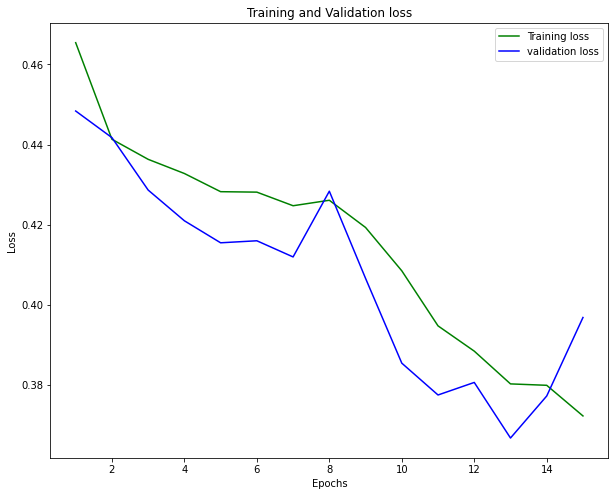

In [74]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

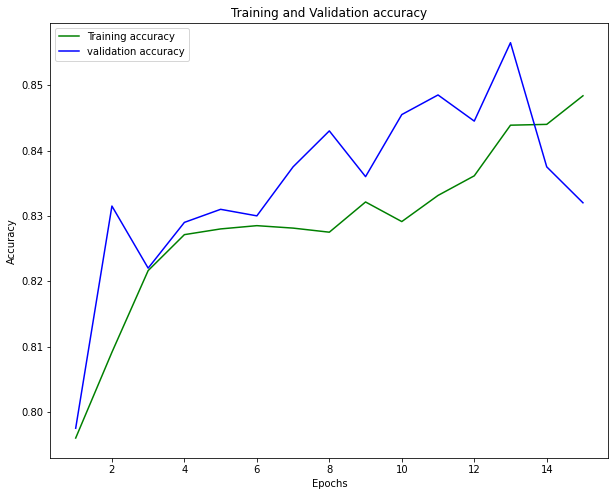

In [75]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 8

In [76]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 15
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier8 = Sequential()

# Adding the input layer and the first hidden layer
classifier8.add(Dense(units = 10, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hidden layer
classifier8.add(Dense(units = 10, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier8.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier8.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier8.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/15
800/800 [==============================] - 3s 4ms/step - loss: 0.4708 - accuracy: 0.7954 - val_loss: 0.4493 - val_accuracy: 0.7975
Epoch 2/15
800/800 [==============================] - 2s 2ms/step - loss: 0.4468 - accuracy: 0.7993 - val_loss: 0.4308 - val_accuracy: 0.7975
Epoch 3/15
800/800 [==============================] - 2s 2ms/step - loss: 0.4365 - accuracy: 0.8167 - val_loss: 0.4545 - val_accuracy: 0.8055
Epoch 4/15
800/800 [==============================] - 2s 2ms/step - loss: 0.4316 - accuracy: 0.8263 - val_loss: 0.4174 - val_accuracy: 0.8330
Epoch 5/15
800/800 [==============================] - 2s 2ms/step - loss: 0.4316 - accuracy: 0.8281 - val_loss: 0.4255 - val_accuracy: 0.8380
Epoch 6/15
800/800 [==============================] - 2s 2ms/step - loss: 0.4270 - accuracy: 0.8281 - val_loss: 0.4153 - val_accuracy: 0.8380
Epoch 7/15
800/800 [==============================] - 2s 2ms/step - loss: 0.4240 - accuracy: 0.8270 - val_loss: 0.4201 - val_accuracy: 0.8335
Epoch 

In [77]:
weights = classifier8.get_weights()
print(weights)
classifier8.save_weights('model8.h5')

[array([[-3.87428701e-01, -1.17279425e-01, -1.40905067e-01,
        -5.64544611e-02, -8.67564380e-02, -9.68951359e-02,
         2.08158404e-01,  4.67506826e-01, -9.66446251e-02,
        -9.47894901e-02],
       [-6.85422346e-02, -3.11863329e-02, -1.12057827e-01,
        -1.74606070e-02, -3.30913439e-02, -4.36229482e-02,
        -5.88003731e+00,  3.67874563e-01, -1.22969866e-01,
        -1.41918540e-01],
       [ 4.13874030e-01, -9.92733836e-02, -1.39993832e-01,
        -1.58181787e-02, -6.55599535e-02, -7.58119151e-02,
         4.70518887e-01,  3.84234011e-01, -8.98663849e-02,
         1.39835626e-01],
       [ 1.75387943e+00, -7.08771423e-02, -1.40527263e-01,
        -9.77765247e-02, -4.57572825e-02, -8.36131424e-02,
        -5.06070328e+00, -7.92433548e+00, -7.85593316e-02,
        -2.79110622e+00],
       [ 1.80541262e-01, -1.24223053e-01, -7.43634850e-02,
        -3.22919786e-02, -1.35511354e-01, -7.40389228e-02,
         1.51601300e-01,  1.57675967e-01, -1.63760081e-01,
         7

In [78]:
# Predicting the Test set results
y_pred = classifier8.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [79]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1529   66]
 [ 253  152]]


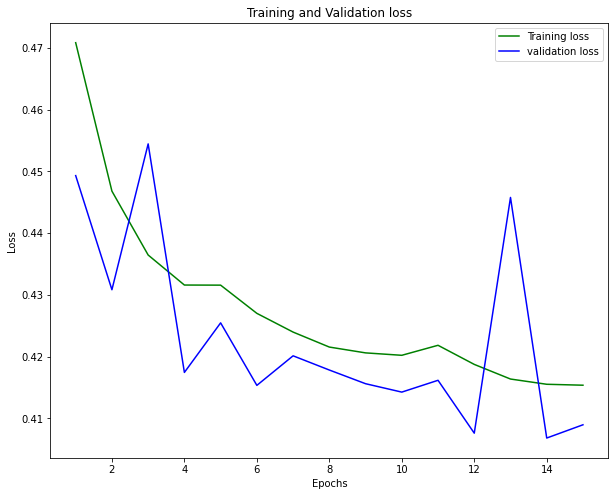

In [80]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

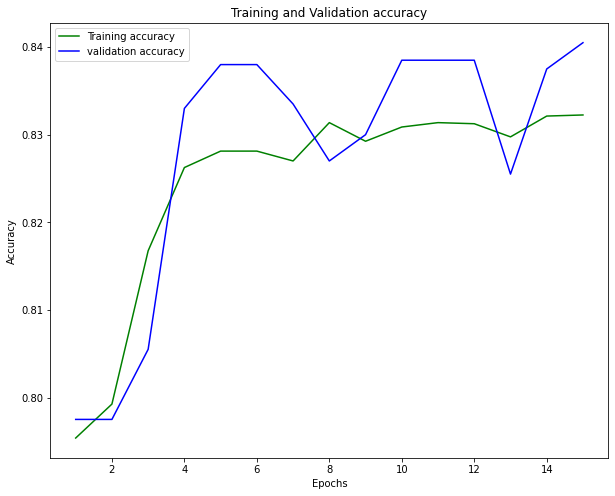

In [81]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 9

In [82]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 30
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier9 = Sequential()

# Adding the input layer and the first hidden layer
classifier9.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hidden layer
classifier9.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier9.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier9.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier9.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) 

Epoch 1/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4681 - accuracy: 0.7955 - val_loss: 0.4435 - val_accuracy: 0.7975
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4464 - accuracy: 0.8050 - val_loss: 0.4638 - val_accuracy: 0.8080
Epoch 3/30
800/800 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.8202 - val_loss: 0.4326 - val_accuracy: 0.8280
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4277 - accuracy: 0.8225 - val_loss: 0.4137 - val_accuracy: 0.8395
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4202 - accuracy: 0.8294 - val_loss: 0.4292 - val_accuracy: 0.8260
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4197 - accuracy: 0.8266 - val_loss: 0.4076 - val_accuracy: 0.8420
Epoch 7/30
800/800 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.8279 - val_loss: 0.4288 - val_accuracy: 0.8360
Epoch 

In [83]:
weights = classifier9.get_weights()
print(weights)
classifier9.save_weights('model9.h5')


[array([[-7.86792934e-02,  1.29997766e+00,  6.05368912e-01,
        -7.57091269e-02, -4.56515640e-01, -3.47189963e-01,
        -1.41301215e-01, -4.58403468e-01, -9.71008167e-02,
         1.58023655e-01, -1.56027749e-01, -5.58669865e-01,
        -2.38085330e-01, -2.40130350e-01, -6.77336454e-02,
         6.32390261e-01, -1.21444732e-01, -9.77150276e-02,
        -1.78161442e-01,  3.73006672e-01],
       [-1.20139971e-01,  2.09806323e+00, -7.64846516e+00,
        -1.20117940e-01,  1.69434682e-01, -7.30955899e-01,
        -7.62187690e-02, -5.36412776e-01, -1.03085250e-01,
         1.07519293e+00, -9.82063264e-02,  7.03830644e-02,
        -2.26961344e-01, -1.70748472e-01, -1.09841444e-01,
        -1.62920260e+00, -2.76705381e-02, -2.33515501e-02,
        -8.85164365e-02,  2.51206100e-01],
       [-6.59665614e-02,  1.07210338e+00,  4.69916970e-01,
        -1.09244749e-01,  1.14141785e-01,  4.23469722e-01,
        -1.26291543e-01,  4.61730659e-01, -1.29368544e-01,
         1.10154986e+00, -1.

In [84]:
# Predicting the Test set results
y_pred = classifier9.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [85]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1553   42]
 [ 273  132]]


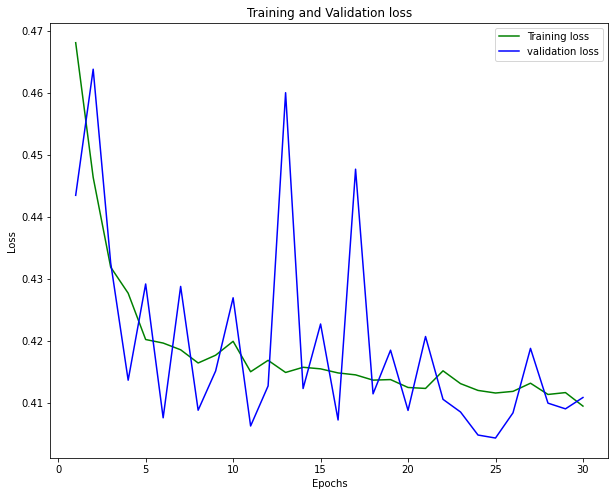

In [86]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

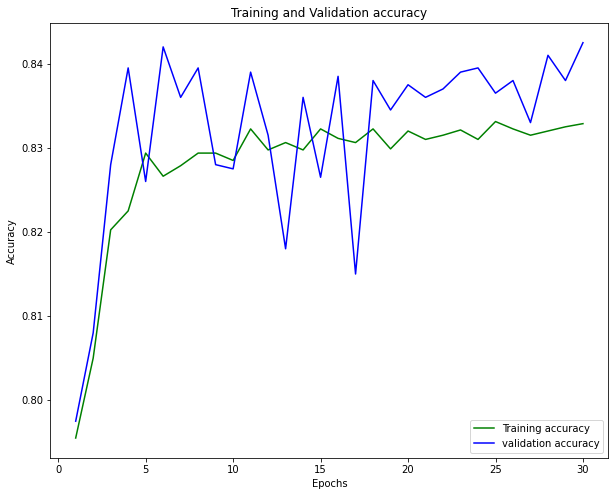

In [87]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 10

In [89]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 30
batch_size = 10
dropout_rate = 0.1
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier10 = Sequential()

# Adding the input layer and the first hidden layer
classifier10.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 
classifier10.add(Dropout(dropout_rate))

# Adding the second hiddent layer
classifier10.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))
classifier10.add(Dropout(dropout_rate))

# Adding the output layer
classifier10.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier10.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier10.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) #verbose = 0 turn off progress

Epoch 1/30
800/800 [==============================] - 3s 3ms/step - loss: 0.4798 - accuracy: 0.7960 - val_loss: 0.4480 - val_accuracy: 0.7975
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4565 - accuracy: 0.8062 - val_loss: 0.4280 - val_accuracy: 0.7975
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4481 - accuracy: 0.8102 - val_loss: 0.4348 - val_accuracy: 0.7975
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4502 - accuracy: 0.8025 - val_loss: 0.4416 - val_accuracy: 0.8180
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4418 - accuracy: 0.8164 - val_loss: 0.4206 - val_accuracy: 0.8345
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.8142 - val_loss: 0.4447 - val_accuracy: 0.8060
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4370 - accuracy: 0.8174 - val_loss: 0.4149 - val_accuracy: 0.8335
Epoch 

In [90]:
weights = classifier10.get_weights()
print(weights)
classifier10.save_weights('model10.h5')

[array([[-6.11558974e-01, -1.54409081e-01, -1.06143601e-01,
         2.07627565e-01, -1.35066658e-01, -1.61083966e-01,
         6.46026075e-01, -1.37317210e-01,  2.38763973e-01,
        -1.43533796e-01, -9.07036439e-02, -4.49511185e-02,
        -3.81321341e-01, -4.13472325e-01, -1.46729812e-01,
        -1.59489065e-01, -3.55432302e-01, -9.93806347e-02,
         1.10865496e-01, -1.01299308e-01],
       [-6.53701663e-01, -2.15038192e-02, -9.25972238e-02,
         2.76509970e-01, -6.12386167e-02, -1.70183882e-01,
        -6.05000210e+00, -9.10338163e-02, -2.05952120e+00,
        -5.25314398e-02, -4.49349396e-02, -1.56677753e-01,
         7.70254210e-02, -3.84017467e-01, -1.54684693e-01,
        -7.44612366e-02, -2.71954346e+00, -7.25658685e-02,
         2.32750461e-01, -1.32407784e-01],
       [-2.95895755e-01, -9.78242233e-03, -3.71614099e-02,
         4.96166199e-01, -1.32731333e-01, -1.43709049e-01,
         3.71971935e-01,  9.54779461e-02, -4.04153689e-05,
        -1.37002125e-01,  8.

In [91]:
# Predicting the Test set results
y_pred = classifier10.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1558   37]
 [ 286  119]]


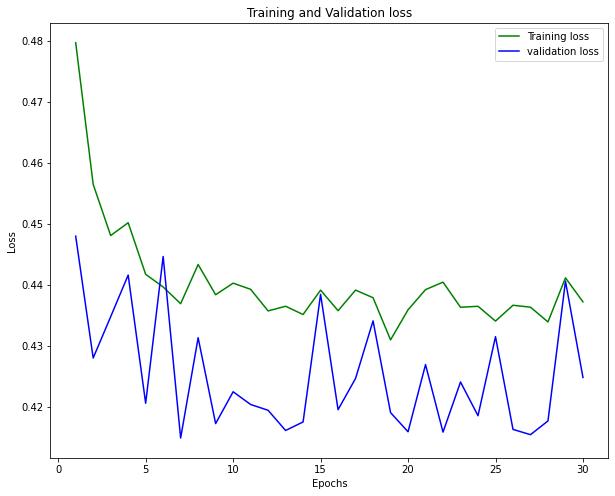

In [93]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

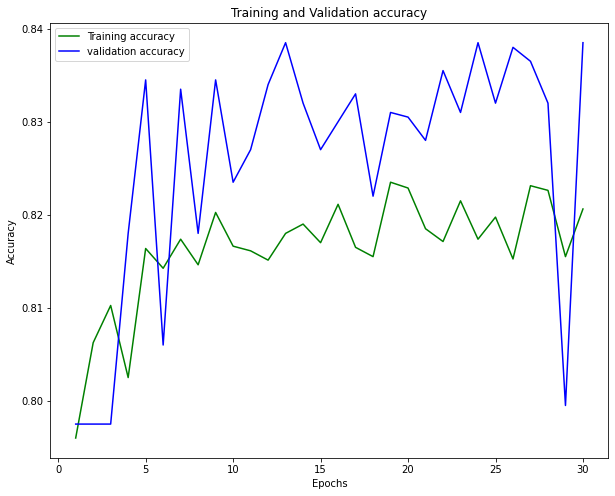

In [94]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 11

In [35]:
from keras.regularizers import l2

# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 30
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier11 = Sequential()

# Adding the input layer and the first hidden layer
classifier11.add(Dense(units = 20, kernel_initializer = initializer ,kernel_regularizer=l2(0.01), activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier11.add(Dense(units = 20, kernel_initializer = initializer, kernel_regularizer=l2(0.01), activation = 'relu'))

# Adding the output layer
classifier11.add(Dense(units = 1, kernel_initializer = initializer, kernel_regularizer=l2(0.01), activation = 'sigmoid'))

# Compiling the ANN
classifier11.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier11.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test)) #verbose = 0 turn off progress

Epoch 1/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5146 - accuracy: 0.7955 - val_loss: 0.5048 - val_accuracy: 0.7975
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5066 - accuracy: 0.7960 - val_loss: 0.5055 - val_accuracy: 0.7975
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5070 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5069 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5065 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 6/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5066 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5041 - val_accuracy: 0.7975
Epoch 

In [36]:
weights = classifier11.get_weights()
print(weights)
classifier11.save_weights('model11.h5')

[array([[ 1.32091959e-35, -2.93977362e-35, -2.12860905e-35,
        -1.57496900e-35, -3.95377496e-36, -2.85601161e-35,
         2.13490322e-35, -1.46528269e-35,  6.59906917e-37,
        -9.07241862e-36, -1.20160433e-36, -1.03049557e-35,
        -3.98897953e-07, -3.28410565e-35, -9.08021036e-08,
         1.77293017e-35,  1.61636428e-35, -1.68022913e-35,
         9.68973611e-36, -3.86869655e-36],
       [-1.48410940e-35, -2.75231900e-35,  1.99636593e-35,
        -2.29217940e-35, -1.64474231e-35,  1.61647032e-35,
        -2.32173077e-35, -3.35121788e-36, -9.75683270e-37,
        -6.86943861e-36,  3.27807263e-35,  2.57677316e-35,
         3.33783458e-35, -6.60195050e-36,  8.51269462e-04,
         1.07688451e-04, -4.73561215e-37,  1.14189519e-35,
        -9.86488434e-36, -1.50857739e-35],
       [ 2.71707799e-36,  2.77790707e-11, -2.06384458e-11,
         2.11458448e-35,  4.62537369e-36, -1.31153285e-36,
        -1.51573051e-36,  1.03600305e-35, -9.21599050e-36,
        -1.01902231e-35, -8.

In [37]:
# Predicting the Test set results
y_pred = classifier11.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


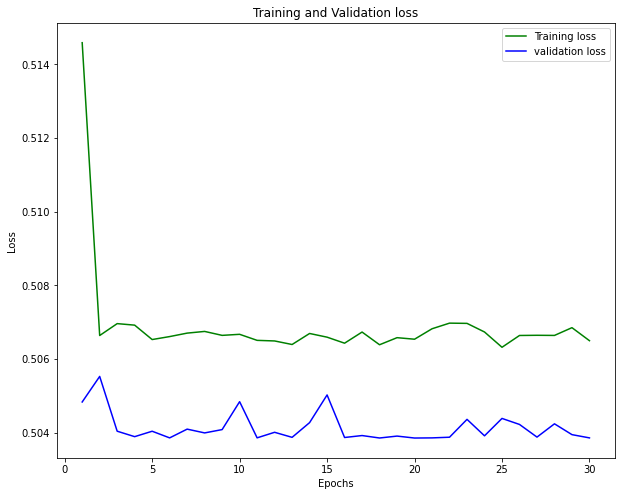

In [39]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

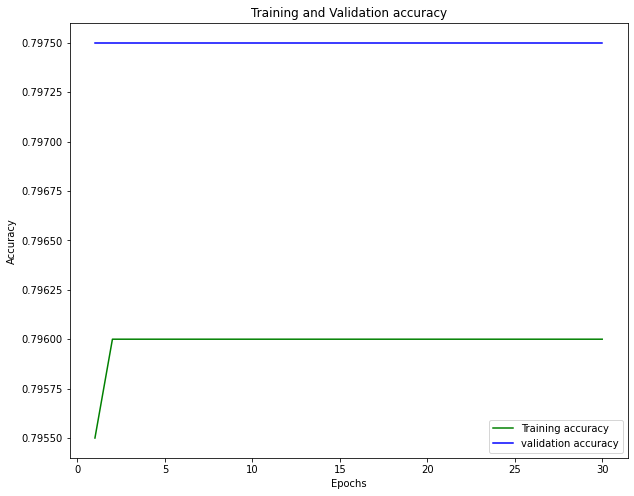

In [40]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 12

In [41]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.01)
epoch = 30
batch_size = 10
initializer =  tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

# Initialising the ANN
classifier12 = Sequential()

# Adding the input layer and the first hidden layer
classifier12.add(Dense(units = 20, kernel_initializer = initializer ,kernel_regularizer=l2(0.01), activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier12.add(Dense(units = 20, kernel_initializer = initializer, kernel_regularizer=l2(0.01), activation = 'relu'))

# Adding the output layer
classifier12.add(Dense(units = 1, kernel_initializer = initializer, kernel_regularizer=l2(0.01), activation = 'sigmoid'))

# Compiling the ANN
classifier12.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier12.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/30
800/800 [==============================] - 3s 4ms/step - loss: 0.5172 - accuracy: 0.7952 - val_loss: 0.5157 - val_accuracy: 0.7975
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5103 - accuracy: 0.7960 - val_loss: 0.5065 - val_accuracy: 0.7975
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5079 - accuracy: 0.7960 - val_loss: 0.5052 - val_accuracy: 0.7975
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5052 - val_accuracy: 0.7975
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5043 - val_accuracy: 0.7975
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5058 - accuracy: 0.7960 - val_loss: 0.5053 - val_accuracy: 0.7975
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 0.5065 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 

In [42]:
weights = classifier12.get_weights()
print(weights)
classifier12.save_weights('model12.h5')

[array([[ 1.73164764e-04, -7.90886356e-10, -4.64506924e-35,
         3.39646609e-35,  1.76541803e-35,  1.54641153e-08,
         3.13370493e-35,  3.03227980e-35, -1.83215689e-35,
         2.36743242e-35,  3.59184644e-12,  4.01575560e-35,
        -3.32814708e-36,  1.76575667e-35,  3.53102030e-35,
         3.57175106e-35,  6.43959683e-36, -4.23129064e-35,
        -5.06356589e-35,  1.77764363e-35],
       [-4.31730606e-35, -5.24829759e-35, -9.51992582e-36,
        -1.18812919e-35, -5.26789069e-35,  1.54160489e-08,
        -3.60303942e-35,  7.17396224e-36, -4.65697830e-35,
        -1.91792063e-35, -1.82754127e-04, -3.69408283e-35,
         4.13000929e-35, -3.04249793e-35,  5.30607876e-35,
        -1.92597977e-35, -3.46585326e-35, -2.62016887e-35,
        -4.11000869e-08,  3.00519608e-35],
       [-4.66382894e-35,  4.37853279e-36, -2.89577494e-35,
         2.26330044e-35,  4.75356599e-35,  4.28296877e-35,
        -4.23836427e-35,  1.16659750e-35, -3.21986155e-35,
        -4.69454275e-35,  1.

In [43]:
# Predicting the Test set results
y_pred = classifier12.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


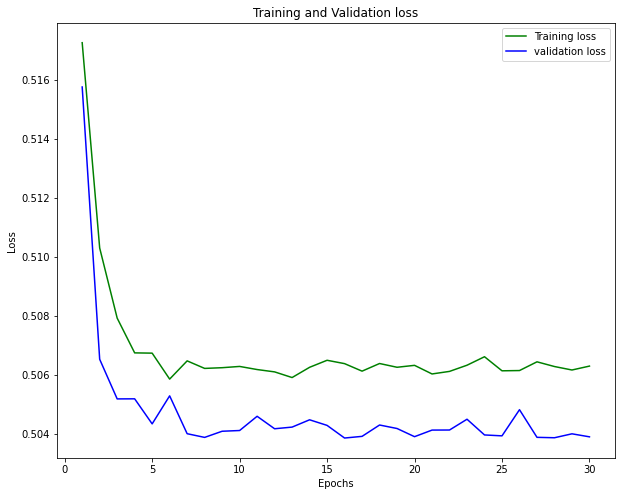

In [46]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

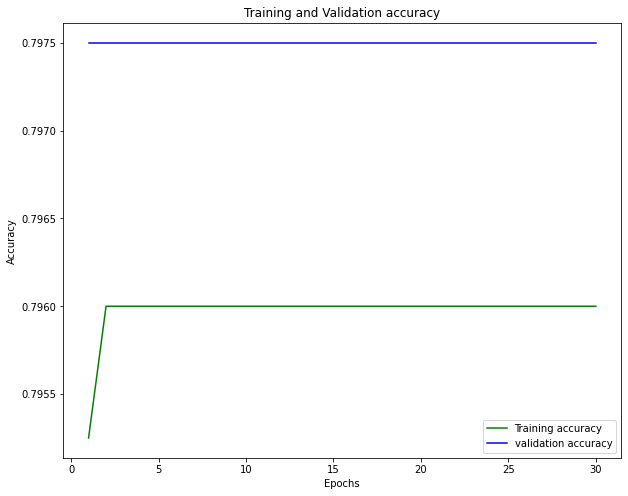

In [47]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 13

In [54]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 40
batch_size = 10
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier13 = Sequential()

# Adding the input layer and the first hidden layer
classifier13.add(Dense(units = 20, kernel_initializer = initializer ,kernel_regularizer=l2(0.01), activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier13.add(Dense(units = 20, kernel_initializer = initializer, kernel_regularizer=l2(0.01), activation = 'relu'))

# Adding the output layer
classifier13.add(Dense(units = 1, kernel_initializer = initializer, kernel_regularizer=l2(0.01), activation = 'sigmoid'))

# Compiling the ANN
classifier13.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier13.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5140 - accuracy: 0.7952 - val_loss: 0.5081 - val_accuracy: 0.7975
Epoch 2/40
800/800 [==============================] - 2s 2ms/step - loss: 0.5079 - accuracy: 0.7960 - val_loss: 0.5041 - val_accuracy: 0.7975
Epoch 3/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5048 - val_accuracy: 0.7975
Epoch 4/40
800/800 [==============================] - 2s 2ms/step - loss: 0.5068 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 5/40
800/800 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 6/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5062 - accuracy: 0.7960 - val_loss: 0.5041 - val_accuracy: 0.7975
Epoch 7/40
800/800 [==============================] - 2s 2ms/step - loss: 0.5069 - accuracy: 0.7960 - val_loss: 0.5038 - val_accuracy: 0.7975
Epoch 

In [55]:
weights = classifier13.get_weights()
print(weights)
classifier13.save_weights('model13.h5')

[array([[ 8.34160179e-36,  2.99703879e-35,  3.24618275e-35,
        -1.93181634e-35, -3.26243735e-36,  1.06404753e-35,
        -2.48132164e-35,  2.13952111e-35, -2.88383777e-35,
        -3.99715934e-36, -4.39628143e-36, -9.56328939e-36,
        -1.15152529e-36,  1.02110145e-35,  1.87985610e-35,
         3.04369926e-35,  3.17526738e-35, -1.02771382e-36,
        -2.40456094e-35,  2.03716514e-35],
       [ 2.80278490e-35, -4.86611470e-36,  1.11658188e-35,
         1.94799933e-35,  9.64221339e-36,  1.00580259e-35,
         3.04755864e-35,  6.65447180e-36,  1.71631933e-38,
         1.84732869e-35, -9.65995486e-36, -1.16546132e-35,
        -2.47961350e-35, -2.47391912e-37,  1.30588224e-35,
         2.97088978e-35, -2.97659965e-35, -1.84701645e-35,
        -1.84910772e-35, -2.79529457e-35],
       [-1.52873829e-12, -6.50436381e-37,  3.38320131e-35,
         1.04690701e-35,  6.35063262e-36,  1.85902724e-35,
         7.89777346e-07,  5.76817316e-36, -2.73012581e-36,
         2.20661441e-35, -5.

In [56]:
# Predicting the Test set results
y_pred = classifier13.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


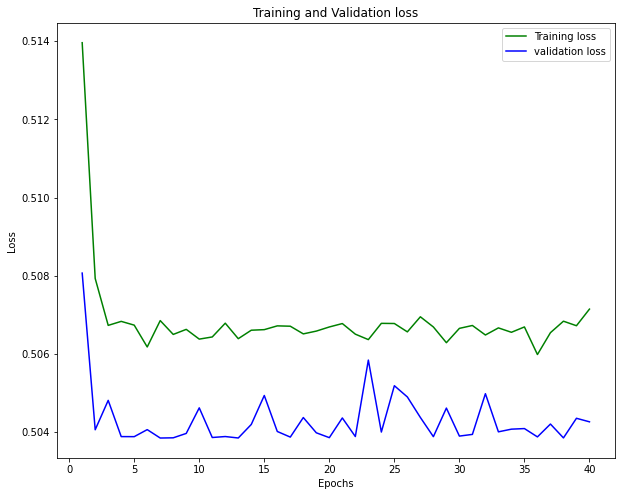

In [58]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

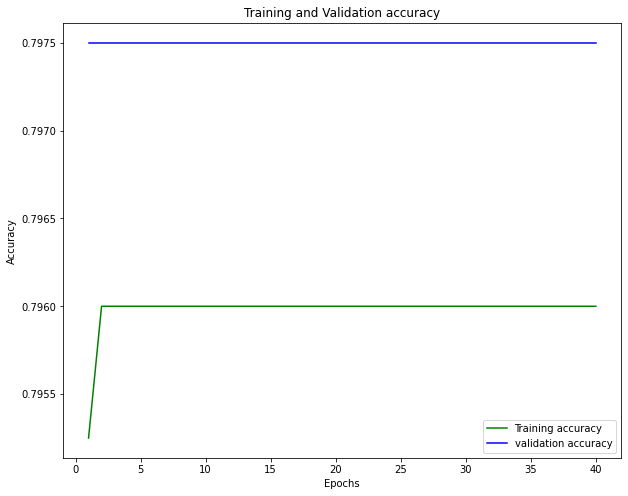

In [59]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 14

In [60]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 40
batch_size = 10
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier14 = Sequential()

# Adding the input layer and the first hidden layer
classifier14.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier14.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))

# Adding the third hiddent layer
classifier14.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier14.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier14.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier14.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4734 - accuracy: 0.7960 - val_loss: 0.4430 - val_accuracy: 0.7975
Epoch 2/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4517 - accuracy: 0.7960 - val_loss: 0.4412 - val_accuracy: 0.7975
Epoch 3/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4435 - accuracy: 0.8054 - val_loss: 0.4173 - val_accuracy: 0.8270
Epoch 4/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4355 - accuracy: 0.8239 - val_loss: 0.4128 - val_accuracy: 0.8305
Epoch 5/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4255 - accuracy: 0.8270 - val_loss: 0.4051 - val_accuracy: 0.8340
Epoch 6/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4152 - accuracy: 0.8314 - val_loss: 0.4163 - val_accuracy: 0.8245
Epoch 7/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4112 - accuracy: 0.8299 - val_loss: 0.4175 - val_accuracy: 0.8310
Epoch 

In [61]:
weights = classifier14.get_weights()
print(weights)
classifier14.save_weights('model14.h5')

[array([[-1.47672430e-01,  5.80345392e-02, -1.38313100e-01,
         1.68549925e-01, -3.90556678e-02, -8.54687274e-01,
        -1.64137542e-01,  1.10244954e+00, -9.59212184e-02,
        -9.54263687e-01,  3.53278548e-01, -1.98196456e-01,
         3.25923413e-01, -2.23239616e-01,  4.37005311e-01,
         6.48238435e-02, -1.54350072e-01,  1.42363518e-01,
        -6.96994364e-01, -6.22639835e-01],
       [-1.59375407e-02, -3.60765867e-02, -3.52866352e-01,
         1.78303790e+00, -1.25498563e-01, -9.38710105e-03,
        -8.59981701e-02, -9.48155880e+00, -1.31957367e-01,
        -1.41032183e+00, -2.46384099e-01, -7.79936984e-02,
        -2.26237512e+00, -6.03307009e-01, -2.07386589e+00,
        -2.38011450e-01, -2.66077053e-02, -6.29124463e-01,
         1.68283224e-01, -7.61290491e-01],
       [-2.13545218e-01,  1.94552988e-01,  4.09061275e-03,
         1.86309731e+00, -1.28920063e-01,  3.56041968e-01,
        -1.28367737e-01,  8.85643363e-01, -8.66381302e-02,
         1.76632762e+00,  6.

In [62]:
# Predicting the Test set results
y_pred = classifier14.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1534   61]
 [ 214  191]]


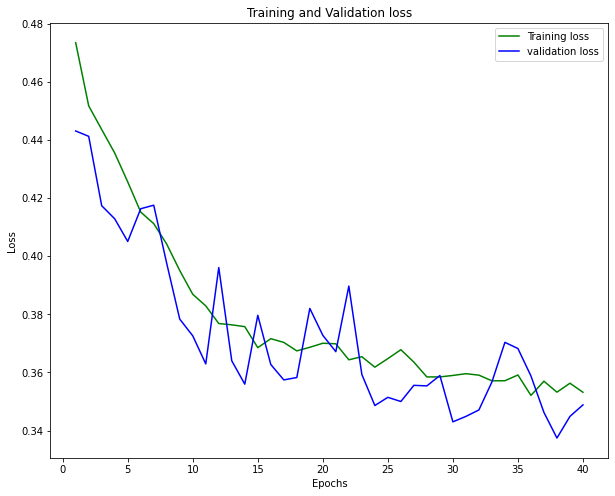

In [64]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

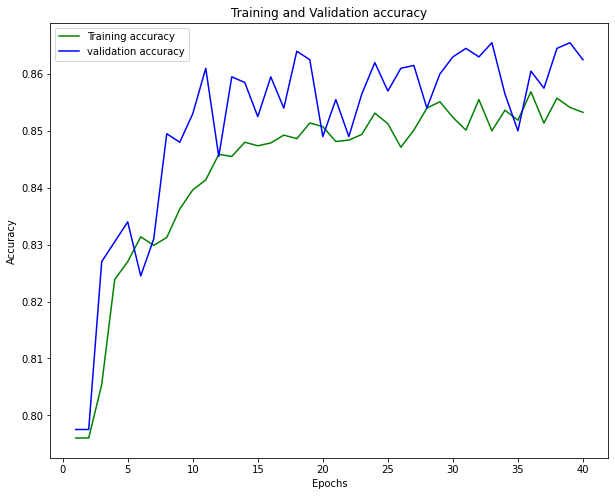

In [65]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 15

In [66]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 60
batch_size = 10
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier15 = Sequential()

# Adding the input layer and the first hidden layer
classifier15.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier15.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))

# Adding the third hiddent layer
classifier15.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier15.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier15.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier15.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/60
800/800 [==============================] - 4s 5ms/step - loss: 0.4733 - accuracy: 0.7952 - val_loss: 0.4531 - val_accuracy: 0.7975
Epoch 2/60
800/800 [==============================] - 3s 3ms/step - loss: 0.4574 - accuracy: 0.7960 - val_loss: 0.4349 - val_accuracy: 0.7975
Epoch 3/60
800/800 [==============================] - 2s 2ms/step - loss: 0.4496 - accuracy: 0.7960 - val_loss: 0.4343 - val_accuracy: 0.7975
Epoch 4/60
800/800 [==============================] - 3s 4ms/step - loss: 0.4434 - accuracy: 0.8018 - val_loss: 0.4274 - val_accuracy: 0.8275
Epoch 5/60
800/800 [==============================] - 2s 2ms/step - loss: 0.4327 - accuracy: 0.8227 - val_loss: 0.4506 - val_accuracy: 0.8225
Epoch 6/60
800/800 [==============================] - 2s 2ms/step - loss: 0.4307 - accuracy: 0.8278 - val_loss: 0.4162 - val_accuracy: 0.8330
Epoch 7/60
800/800 [==============================] - 2s 3ms/step - loss: 0.4270 - accuracy: 0.8304 - val_loss: 0.4122 - val_accuracy: 0.8410
Epoch 

In [67]:
weights = classifier15.get_weights()
print(weights)
classifier15.save_weights('model15.h5')

[array([[-1.34035647e-01,  6.06814146e-01, -4.28051613e-02,
        -4.77030873e-02, -1.06346406e-01, -1.43485680e-01,
         5.43755054e-01, -1.29456490e-01, -1.08026825e-01,
        -1.51034981e-01, -1.28745019e-01, -1.16078377e-01,
        -1.00065641e-01, -1.75248861e+00, -3.14386152e-02,
        -6.56526536e-02, -1.65112287e-01, -2.12435097e-01,
         1.26018763e-01, -1.44857585e-01],
       [-1.20896794e-01, -1.18035326e+01, -1.03402436e-01,
        -1.01502645e+00, -9.21113864e-02, -1.46272704e-01,
         8.96654248e-01,  6.80342317e-02, -8.64588618e-02,
        -1.41812891e-01, -1.03916921e-01,  3.47532816e-02,
        -1.03358306e-01, -7.26786554e-01, -5.36824688e-02,
        -1.08466193e-01, -1.19604126e-01, -1.70397162e-02,
         2.76010454e-01, -1.08583309e-01],
       [-6.18349463e-02,  3.82659584e-01, -7.68054724e-02,
        -2.86252405e-02, -1.08758114e-01, -3.54612023e-02,
         5.28778911e-01, -1.16270259e-01, -1.74149424e-02,
        -1.19761527e-01,  3.

In [68]:
# Predicting the Test set results
y_pred = classifier15.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1560   35]
 [ 283  122]]


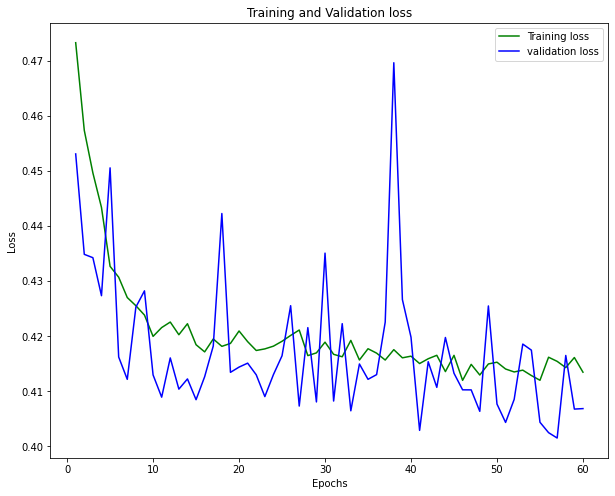

In [70]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

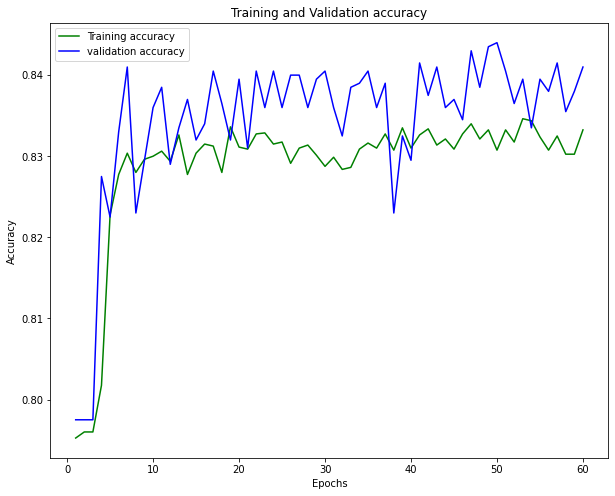

In [71]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 16

In [73]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 40
batch_size = 20
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier16 = Sequential()

# Adding the input layer and the first hidden layer
classifier16.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier16.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))

# Adding the third hiddent layer
classifier16.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier16.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier16.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier16.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/40
400/400 [==============================] - 2s 5ms/step - loss: 0.4760 - accuracy: 0.7960 - val_loss: 0.4657 - val_accuracy: 0.7975
Epoch 2/40
400/400 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.7969 - val_loss: 0.4495 - val_accuracy: 0.7975
Epoch 3/40
400/400 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8169 - val_loss: 0.4225 - val_accuracy: 0.8275
Epoch 4/40
400/400 [==============================] - 1s 3ms/step - loss: 0.4345 - accuracy: 0.8226 - val_loss: 0.4226 - val_accuracy: 0.8310
Epoch 5/40
400/400 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.8241 - val_loss: 0.4323 - val_accuracy: 0.8300
Epoch 6/40
400/400 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.8271 - val_loss: 0.4186 - val_accuracy: 0.8355
Epoch 7/40
400/400 [==============================] - 2s 4ms/step - loss: 0.4288 - accuracy: 0.8295 - val_loss: 0.4174 - val_accuracy: 0.8385
Epoch 

In [74]:
weights = classifier16.get_weights()
print(weights)
classifier16.save_weights('model16.h5')

[array([[-1.46915391e-02, -2.07253337e-01,  4.60930228e-01,
        -1.05981715e-01, -1.15753397e-01, -1.87074751e-01,
        -4.63468134e-02, -3.77185851e-01, -1.71310648e-01,
        -1.33423313e-01, -8.93345997e-02,  1.42188981e-01,
        -1.23539940e-01, -3.70756090e-01, -7.99348652e-01,
        -5.74971676e-01,  4.68859449e-04, -1.18147835e-01,
        -1.76110730e-01,  2.27913871e-01],
       [-7.93133557e-01, -4.93794680e-02, -1.13390744e-01,
         4.62898016e+00, -1.36762440e+00, -5.51492535e-02,
         3.38765197e-02, -1.64911306e+00, -1.09562941e-01,
        -5.28228432e-02, -8.96845460e-02, -4.25020754e-01,
        -1.43645212e-01,  7.33102858e-02, -1.38613212e+00,
        -1.07502031e+00, -6.45320797e+00, -6.57072663e-02,
        -1.17518954e-01, -9.60313976e-02],
       [ 2.09437340e-01,  7.51948357e-02,  2.72319317e-01,
         2.85295159e-01,  3.77242230e-02, -7.96516091e-02,
         6.87953383e-02, -7.35707879e-02, -6.88863471e-02,
        -4.88933846e-02, -1.

In [75]:
# Predicting the Test set results
y_pred = classifier16.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1545   50]
 [ 274  131]]


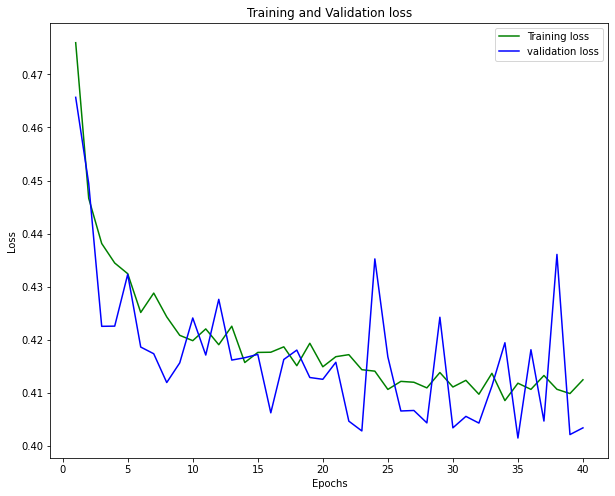

In [77]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

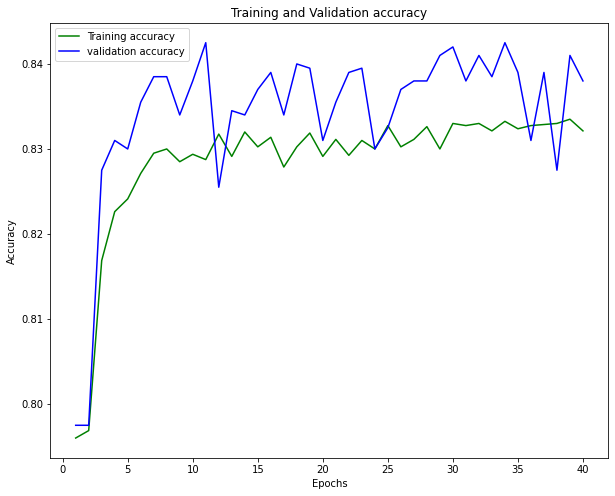

In [78]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 17

In [79]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 60
batch_size = 20
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier17 = Sequential()

# Adding the input layer and the first hidden layer
classifier17.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier17.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))

# Adding the third hiddent layer
classifier17.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier17.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier17.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier17.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/60
400/400 [==============================] - 2s 5ms/step - loss: 0.4689 - accuracy: 0.7954 - val_loss: 0.4418 - val_accuracy: 0.7975
Epoch 2/60
400/400 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8056 - val_loss: 0.4342 - val_accuracy: 0.8150
Epoch 3/60
400/400 [==============================] - 1s 2ms/step - loss: 0.4333 - accuracy: 0.8214 - val_loss: 0.4226 - val_accuracy: 0.8230
Epoch 4/60
400/400 [==============================] - 1s 3ms/step - loss: 0.4333 - accuracy: 0.8248 - val_loss: 0.4207 - val_accuracy: 0.8280
Epoch 5/60
400/400 [==============================] - 1s 4ms/step - loss: 0.4271 - accuracy: 0.8263 - val_loss: 0.4183 - val_accuracy: 0.8275
Epoch 6/60
400/400 [==============================] - 1s 3ms/step - loss: 0.4310 - accuracy: 0.8260 - val_loss: 0.4125 - val_accuracy: 0.8320
Epoch 7/60
400/400 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8294 - val_loss: 0.4120 - val_accuracy: 0.8375
Epoch 

In [80]:
weights = classifier17.get_weights()
print(weights)
classifier17.save_weights('model17.h5')

[array([[-7.80812651e-02, -1.57657266e-01,  3.20759594e-01,
        -1.27396911e-01, -9.93638411e-02,  1.47069442e+00,
        -4.44634765e-01,  2.75582492e-01, -8.91993567e-03,
        -1.15868144e-01, -1.71975747e-01,  9.51558053e-02,
         1.91168949e-01,  1.14268030e-03, -3.19818966e-02,
         3.43858749e-01,  2.40722060e-01, -2.33139675e-02,
        -3.26281428e-01,  6.03441000e-02],
       [-3.60348225e-02, -6.77996799e-02,  4.77412134e-01,
        -1.17998831e-01, -9.69169885e-02, -3.05322814e+00,
        -5.79905629e-01, -3.02849913e+00,  2.93087631e-01,
        -4.31470349e-02, -1.12776011e-01,  3.01180887e+00,
         3.06653291e-01,  7.78159201e-02, -1.05987422e-01,
         5.10997117e-01, -8.47127438e+00, -8.73836651e-02,
        -5.65275908e-01,  8.45057145e-02],
       [-4.21993546e-02, -1.31159648e-01,  2.56613642e-01,
        -1.10096686e-01, -7.14597777e-02, -1.67261434e+00,
        -2.81271309e-01,  2.34586453e+00,  5.74764371e-01,
        -3.72527502e-02, -2.

In [81]:
# Predicting the Test set results
y_pred = classifier17.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [82]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1514   81]
 [ 244  161]]


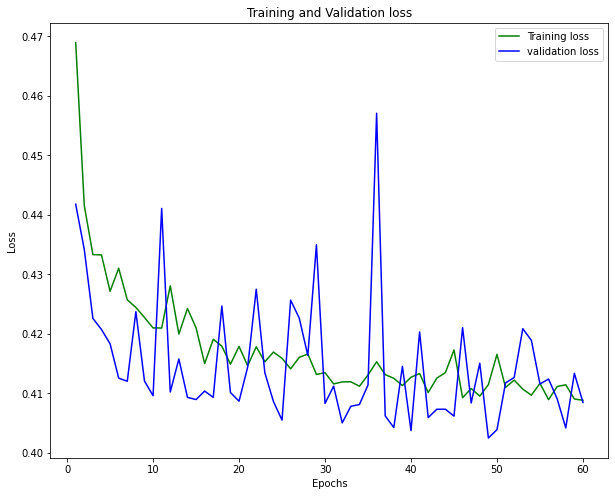

In [83]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

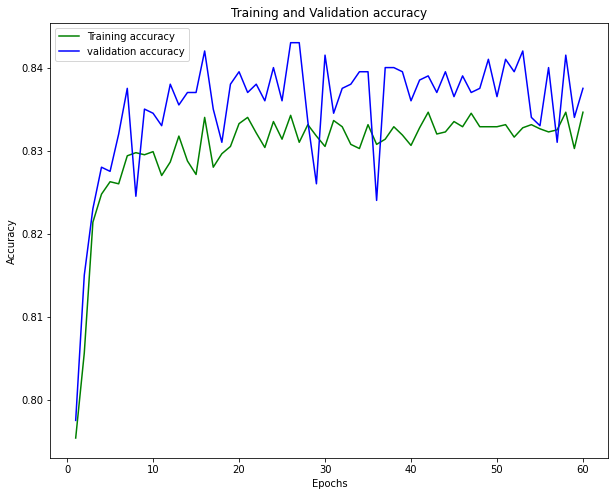

In [84]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 18

In [85]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.01)
epoch = 40
batch_size = 10
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier18 = Sequential()

# Adding the input layer and the first hidden layer
classifier18.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier18.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))

# Adding the third hiddent layer
classifier18.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier18.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier18.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier18.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/40
800/800 [==============================] - 3s 3ms/step - loss: 0.4737 - accuracy: 0.7960 - val_loss: 0.4450 - val_accuracy: 0.7975
Epoch 2/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4473 - accuracy: 0.7960 - val_loss: 0.4311 - val_accuracy: 0.7975
Epoch 3/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4377 - accuracy: 0.8140 - val_loss: 0.4280 - val_accuracy: 0.8250
Epoch 4/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4335 - accuracy: 0.8236 - val_loss: 0.4298 - val_accuracy: 0.8355
Epoch 5/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4268 - accuracy: 0.8301 - val_loss: 0.4376 - val_accuracy: 0.8240
Epoch 6/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4303 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.8340
Epoch 7/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4232 - accuracy: 0.8289 - val_loss: 0.4299 - val_accuracy: 0.8250
Epoch 

In [86]:
weights = classifier18.get_weights()
print(weights)
classifier18.save_weights('model18.h5')

[array([[-7.74812028e-02, -2.66927369e-02,  1.41501073e-02,
         4.87850070e-01,  1.43138498e-01, -3.21568817e-01,
        -8.29182208e-01, -4.14379090e-01,  1.49804890e-01,
        -2.20625978e-02, -2.44487301e-02, -1.05609345e+00,
         4.12782818e-01, -1.44877270e-01, -1.26490444e-01,
         4.72235292e-01, -8.59216824e-02, -6.96542487e-02,
         2.12964386e-01, -9.43971574e-02],
       [-8.64734054e-02, -4.91434336e-01, -5.21353297e-02,
         5.95653057e-01, -1.03373337e+00, -3.74384314e-01,
         1.20211139e-01,  5.37541462e-03,  2.13523552e-01,
        -4.20442522e-02, -1.29131392e-01,  9.12217617e-01,
         7.11755678e-02, -7.85892829e-02, -7.16933906e-02,
        -1.11051643e+00, -9.50200483e-02, -6.98386580e-02,
        -6.58366728e+00,  3.05233032e-01],
       [ 2.32000332e-02,  1.04859084e-01, -2.84656584e-02,
        -3.22367877e-01,  1.43304944e-01, -7.49642923e-02,
        -3.08621287e-01,  1.50764976e-02,  3.81588340e-02,
         1.23903109e-02, -7.

In [87]:
# Predicting the Test set results
y_pred = classifier18.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)


[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [88]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1477  118]
 [ 174  231]]


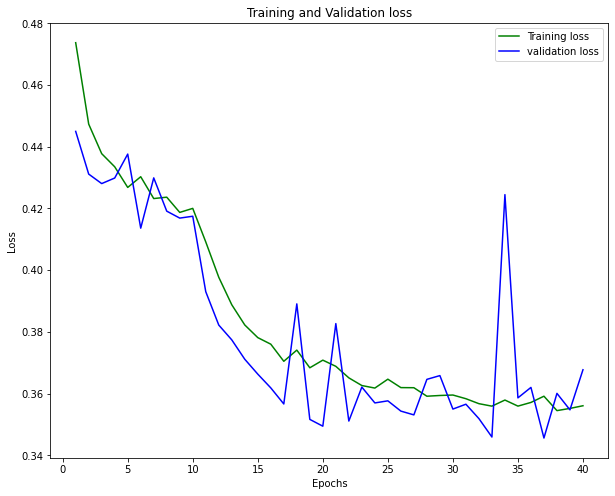

In [89]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

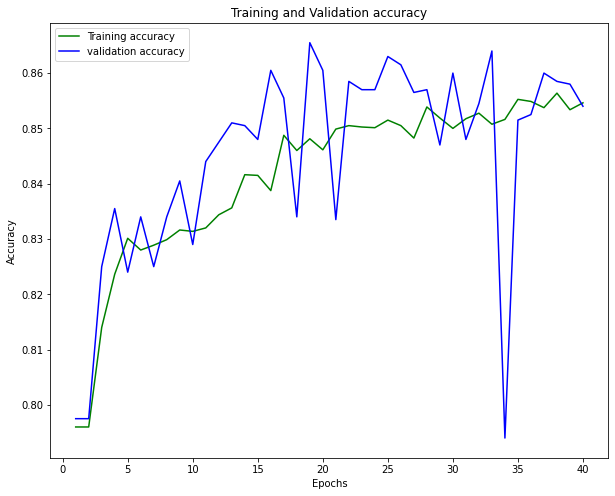

In [90]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 19

In [91]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 40
batch_size = 10
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier19 = Sequential()

# Adding the input layer and the first hidden layer
classifier19.add(Dense(units = 20, kernel_initializer = initializer, activation = 'tanh', input_dim = 10)) 

# Adding the second hiddent layer
classifier19.add(Dense(units = 20, kernel_initializer = initializer, activation = 'tanh'))

# Adding the third hiddent layer
classifier19.add(Dense(units = 5, kernel_initializer = initializer, activation = 'tanh'))

# Adding the output layer
classifier19.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier19.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier19.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/40
800/800 [==============================] - 3s 3ms/step - loss: 0.5120 - accuracy: 0.7959 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 2/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5108 - accuracy: 0.7960 - val_loss: 0.5129 - val_accuracy: 0.7975
Epoch 3/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5111 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 4/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5097 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 5/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5100 - accuracy: 0.7960 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 6/40
800/800 [==============================] - 3s 3ms/step - loss: 0.5097 - accuracy: 0.7960 - val_loss: 0.5045 - val_accuracy: 0.7975
Epoch 7/40
800/800 [==============================] - 2s 3ms/step - loss: 0.5094 - accuracy: 0.7960 - val_loss: 0.5040 - val_accuracy: 0.7975
Epoch 

In [92]:
weights = classifier19.get_weights()
print(weights)
classifier19.save_weights('model19.h5')

[array([[ 0.7322311 , -0.6650967 ,  0.7445729 , -0.61126643, -0.7783823 ,
        -0.68580526,  0.7140049 , -0.5572464 ,  0.766451  ,  0.6201341 ,
         0.8304034 , -0.674524  ,  0.7202637 ,  0.61964595,  0.05057584,
         0.73810196,  1.1112554 , -0.62585026, -0.7888888 , -0.6629914 ],
       [-0.01275012, -0.38839722,  0.00531244,  0.2846625 ,  0.10563293,
        -0.06261136,  0.10444795, -0.04581038,  0.02299011,  0.19012071,
        -0.06976057,  0.11285646,  0.06770935,  0.23510423, -0.02658973,
         0.4369129 , -0.00871953, -0.11848409, -0.05138304,  0.18970636],
       [ 0.0388997 , -1.062153  , -0.07692175,  0.5012209 ,  0.26145083,
         0.01645373,  0.45457092, -0.43484014,  0.03700866,  0.4927617 ,
         0.00533736,  0.05297062, -0.09074157,  1.1903838 , -0.9378059 ,
         1.1112647 ,  0.14885154, -0.60742265, -0.33976135,  0.19774243],
       [ 0.655877  ,  0.44628873,  0.66523165, -0.8566154 , -0.6204828 ,
        -0.629747  ,  0.4677468 , -0.53725976, 

In [93]:
# Predicting the Test set results
y_pred = classifier19.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred, y_test)


[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]] [0 1 0 ... 0 0 0]


In [94]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


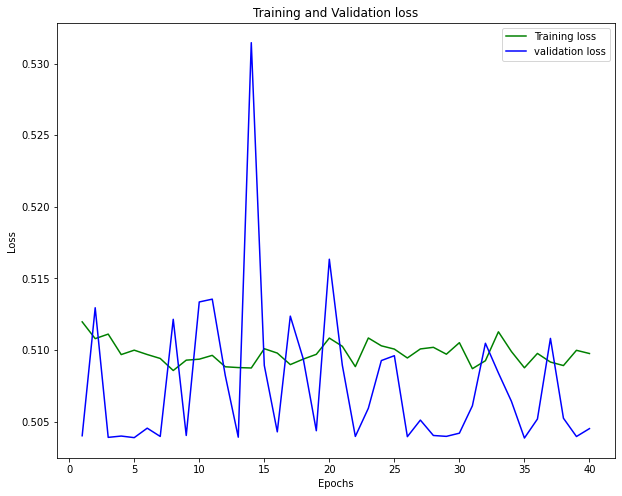

In [95]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

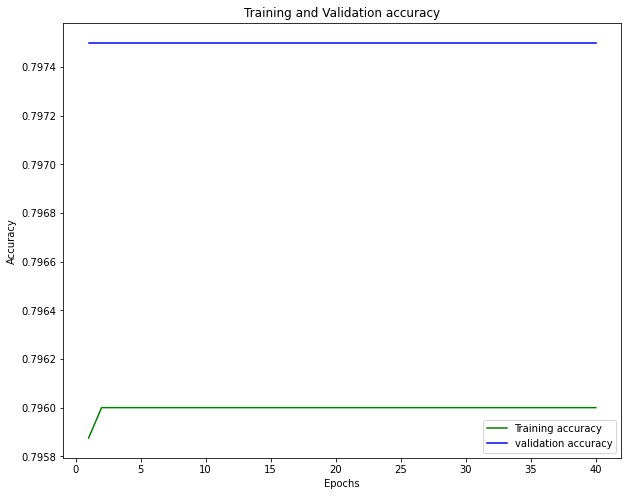

In [96]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 20

In [97]:
# set optimizer and learning rate and other parameters
optimizer = Adam(lr = 0.02)
epoch = 40
batch_size = 10
initializer =  tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier20 = Sequential()

# Adding the input layer and the first hidden layer
classifier20.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu', input_dim = 10)) 

# Adding the second hiddent layer
classifier20.add(Dense(units = 20, kernel_initializer = initializer, activation = 'relu'))

# Adding the third hiddent layer
classifier20.add(Dense(units = 5, kernel_initializer = initializer, activation = 'relu'))

# Adding the output layer
classifier20.add(Dense(units = 1, kernel_initializer = initializer, activation = 'tanh'))

# Compiling the ANN
classifier20.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier20.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, y_test))

Epoch 1/40
800/800 [==============================] - 6s 7ms/step - loss: 0.4748 - accuracy: 0.8019 - val_loss: 0.4139 - val_accuracy: 0.8330
Epoch 2/40
800/800 [==============================] - 3s 3ms/step - loss: 0.4099 - accuracy: 0.8346 - val_loss: 0.3897 - val_accuracy: 0.8430
Epoch 3/40
800/800 [==============================] - 3s 3ms/step - loss: 0.3922 - accuracy: 0.8411 - val_loss: 0.3624 - val_accuracy: 0.8530
Epoch 4/40
800/800 [==============================] - 2s 3ms/step - loss: 0.3823 - accuracy: 0.8430 - val_loss: 0.3728 - val_accuracy: 0.8545
Epoch 5/40
800/800 [==============================] - 2s 3ms/step - loss: 0.3811 - accuracy: 0.8443 - val_loss: 0.3540 - val_accuracy: 0.8570
Epoch 6/40
800/800 [==============================] - 3s 3ms/step - loss: 0.3796 - accuracy: 0.8459 - val_loss: 0.3793 - val_accuracy: 0.8330
Epoch 7/40
800/800 [==============================] - 4s 4ms/step - loss: 0.3835 - accuracy: 0.8503 - val_loss: 0.3632 - val_accuracy: 0.8540
Epoch 

In [98]:
weights = classifier20.get_weights()
print(weights)
classifier20.save_weights('model20.h5')

[array([[-1.67026132e-01, -1.79244503e-01, -1.68025637e+00,
         1.16792405e+00, -7.11285546e-02, -1.16842903e-01,
        -3.20966077e+00, -1.02041788e-01, -3.91749829e-01,
        -4.24694508e-01,  4.93544966e-01, -1.26317024e-01,
        -4.13902521e-01, -1.16321385e+00, -1.20728709e-01,
        -9.08242688e-02, -1.60991624e-01, -1.26453376e+00,
        -1.39280379e-01, -1.39940932e-01],
       [ 5.64945862e-02,  1.43300310e-01, -1.82592225e+00,
         1.04580760e+00, -1.92910329e-01, -5.21822609e-02,
        -1.10218680e+00, -1.28935903e-01,  4.86827880e-01,
        -1.59057856e+00, -3.95559877e-01, -9.72990915e-02,
        -1.37270343e+00,  1.98668808e-01, -1.46767527e-01,
        -4.79523167e-02, -1.45438567e-01, -3.87209654e-01,
        -1.27578422e-01,  1.26659113e-03],
       [-2.40748838e-01, -2.46442869e-01, -1.98643327e+00,
        -1.79162443e+00, -3.71805727e-02, -8.38652700e-02,
        -1.10272837e+00, -1.89520046e-01, -7.56545305e-01,
         1.77206576e-01, -1.

In [99]:
# Predicting the Test set results
y_pred = classifier20.predict(X_test)
y_pred = (y_pred > 0)
print(y_pred, y_test)


[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]] [0 1 0 ... 0 0 0]


In [100]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0 1595]
 [   0  405]]


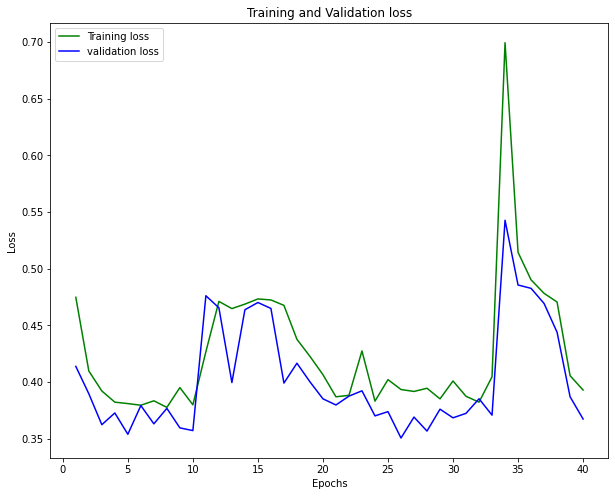

In [101]:
# plots the graph of the training loss vs. validation loss over the number of epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

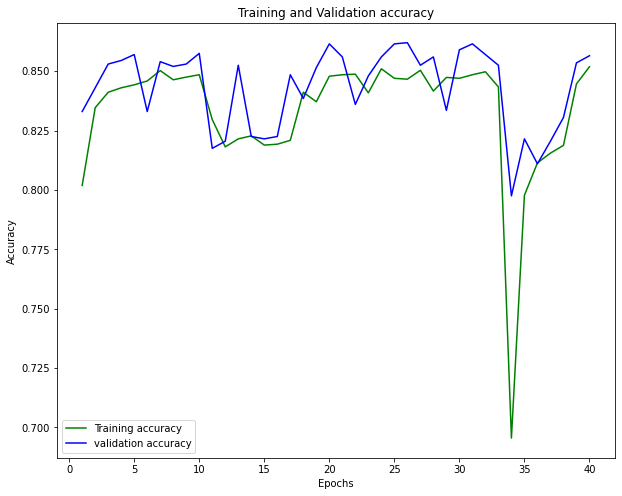

In [102]:
# plots the graph of training accuracy vs. validation accuracy over the number of epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()